**Importing Libraries**

In [313]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

In [314]:
data = pd.read_csv('Iris Flower - Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [315]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [316]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [317]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


(150, 6)

In [318]:
# Data Description :
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Dropping unneccsary feature**

In [319]:
data=data.iloc[:,1:]

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Removing missing values and data duplication**

In [321]:
# Checking for missing values :
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [322]:
data=data.fillna(method='bfill')
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [323]:
# Checking for duplicate values :
data.duplicated().sum()

3

In [324]:
# Datatypes :
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [325]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Label Encoding**

In [326]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [327]:
# Convert the 'Species' column to numeric labels
data['Species'] = enc.fit_transform(data['Species'])

# Get the different values in the 'Species' column after encoding
diff_species = data['Species'].unique()

# Print the encoded values
print("Species Values:")
print(diff_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Species Values:
[0 1 2]


In [328]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


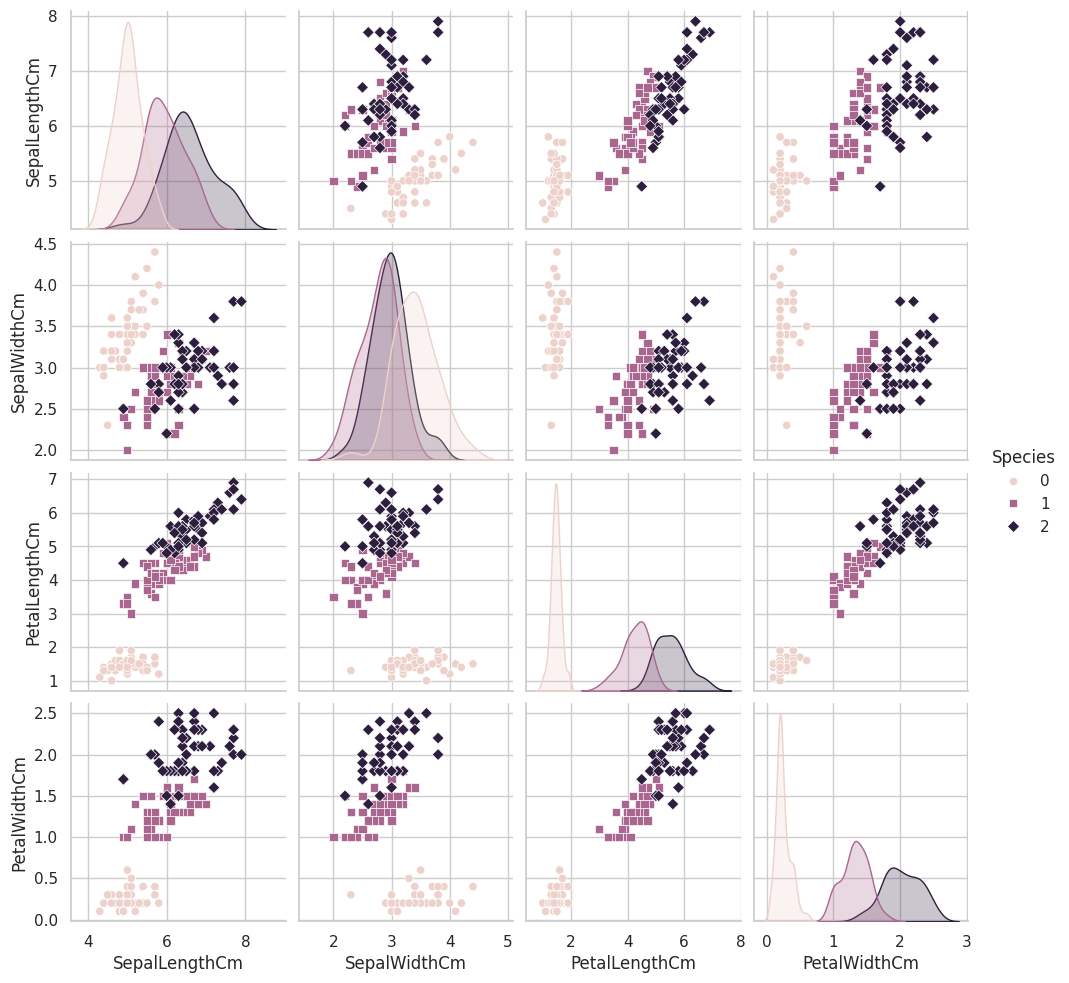

In [330]:
# Visualizing
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.show()

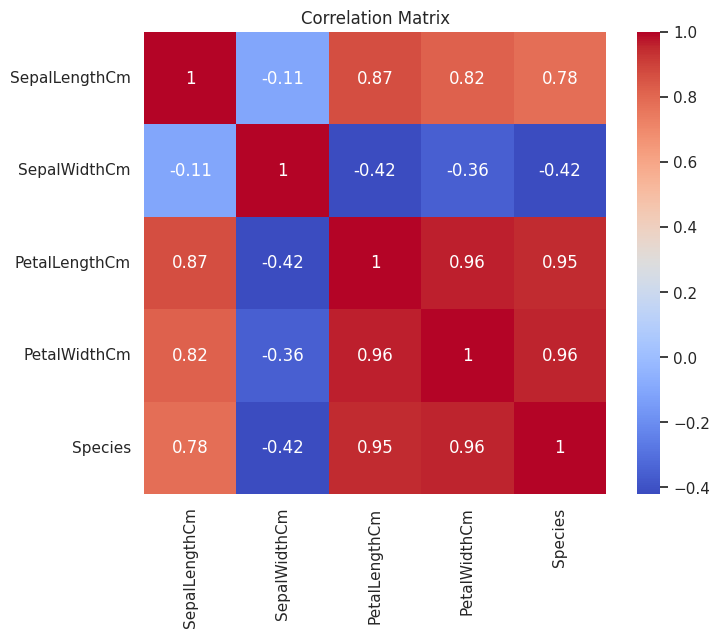

In [331]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

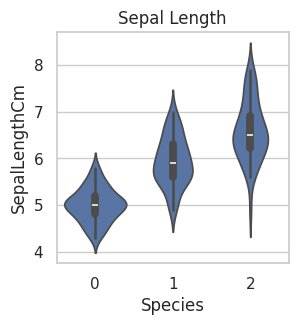

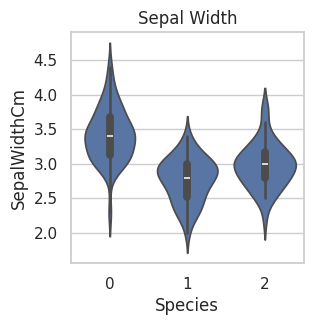

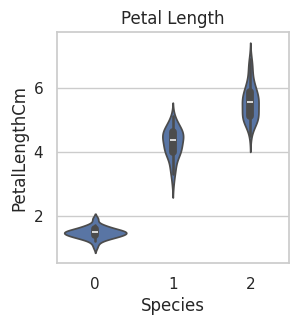

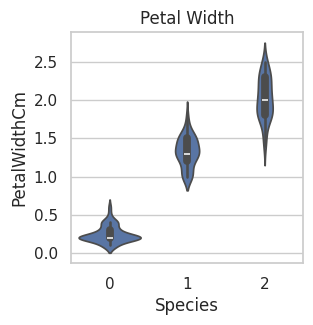

In [332]:
plt.figure(figsize=(3, 3))
sns.violinplot(data=data, x='Species', y='SepalLengthCm')
plt.title('Sepal Length')
plt.show()

plt.figure(figsize=(3, 3))
sns.violinplot(data=data, x='Species', y='SepalWidthCm')
plt.title('Sepal Width')
plt.show()

plt.figure(figsize=(3, 3))
sns.violinplot(data=data, x='Species', y='PetalLengthCm')
plt.title('Petal Length')
plt.show()

plt.figure(figsize=(3, 3))
sns.violinplot(data=data, x='Species', y='PetalWidthCm')
plt.title('Petal Width')
plt.show()

In [333]:
X=data.drop('Species',axis=1)

In [334]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [335]:
Y=data['Species']

In [336]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [337]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 10)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [338]:
Y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: Species, Length: 120, dtype: int64

In [339]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [340]:
Y_test

87     1
111    2
10     0
91     1
49     0
60     1
72     1
67     1
39     0
55     1
66     1
142    2
53     1
1      0
19     0
112    2
85     1
38     0
21     0
35     0
102    2
132    2
126    2
24     0
61     1
2      0
95     1
90     1
76     1
117    2
Name: Species, dtype: int64

**Normalization**


In [341]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [342]:
# Normalization :
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [343]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (120, 4)
Y_train: (120,)
X_test: (30, 4)
Y_test: (30,)


In [344]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_train_std

array([[ 0.87110766, -0.39172306,  0.46043367,  0.10671977],
       [ 0.39378839, -0.39172306,  0.29163925,  0.10671977],
       [ 1.58708656, -0.15901629,  1.13561136,  0.49479165],
       [-0.08353087, -0.62442982,  0.74175771,  1.52965   ],
       [ 0.51311821, -1.32255012,  0.6854929 ,  0.88286353],
       [-1.51548867,  0.30639724, -1.34004016, -1.31621046],
       [ 0.99043748,  0.53910401,  1.07934655,  1.14157812],
       [ 1.22909711,  0.30639724,  1.07934655,  1.4002927 ],
       [ 2.18373564, -1.08984336,  1.75452424,  1.4002927 ],
       [ 1.22909711,  0.07369048,  0.74175771,  1.4002927 ],
       [-1.0381694 ,  0.77181078, -1.22751054, -1.05749587],
       [-1.0381694 ,  1.00451754, -1.22751054, -0.79878129],
       [-0.79950977, -0.85713659,  0.06658002,  0.23607706],
       [-1.63481849, -1.78796365, -1.39630496, -1.18685317],
       [ 0.51311821,  0.53910401,  0.51669848,  0.49479165],
       [-0.79950977,  2.40075814, -1.28377535, -1.44556776],
       [ 1.22909711,  0.

**Scaler Object**

In [345]:
import pickle
import os

In [346]:
X_train_std

array([[ 0.87110766, -0.39172306,  0.46043367,  0.10671977],
       [ 0.39378839, -0.39172306,  0.29163925,  0.10671977],
       [ 1.58708656, -0.15901629,  1.13561136,  0.49479165],
       [-0.08353087, -0.62442982,  0.74175771,  1.52965   ],
       [ 0.51311821, -1.32255012,  0.6854929 ,  0.88286353],
       [-1.51548867,  0.30639724, -1.34004016, -1.31621046],
       [ 0.99043748,  0.53910401,  1.07934655,  1.14157812],
       [ 1.22909711,  0.30639724,  1.07934655,  1.4002927 ],
       [ 2.18373564, -1.08984336,  1.75452424,  1.4002927 ],
       [ 1.22909711,  0.07369048,  0.74175771,  1.4002927 ],
       [-1.0381694 ,  0.77181078, -1.22751054, -1.05749587],
       [-1.0381694 ,  1.00451754, -1.22751054, -0.79878129],
       [-0.79950977, -0.85713659,  0.06658002,  0.23607706],
       [-1.63481849, -1.78796365, -1.39630496, -1.18685317],
       [ 0.51311821,  0.53910401,  0.51669848,  0.49479165],
       [-0.79950977,  2.40075814, -1.28377535, -1.44556776],
       [ 1.22909711,  0.

In [347]:
X_test_std

array([[ 0.51311821, -1.78796365,  0.34790406,  0.10671977],
       [ 0.63244803, -0.85713659,  0.85428732,  0.88286353],
       [-0.56085014,  1.46993107, -1.28377535, -1.31621046],
       [ 0.27445858, -0.15901629,  0.46043367,  0.23607706],
       [-1.0381694 ,  0.53910401, -1.34004016, -1.31621046],
       [-1.0381694 , -2.48608395, -0.15847921, -0.28135211],
       [ 0.51311821, -1.32255012,  0.62922809,  0.36543435],
       [-0.08353087, -0.85713659,  0.17910964, -0.28135211],
       [-0.91883959,  0.77181078, -1.28377535, -1.31621046],
       [-0.20286069, -0.62442982,  0.40416886,  0.10671977],
       [-0.3221905 , -0.15901629,  0.40416886,  0.36543435],
       [-0.08353087, -0.85713659,  0.74175771,  0.88286353],
       [-0.44152032, -1.78796365,  0.12284483,  0.10671977],
       [-1.15749922, -0.15901629, -1.34004016, -1.31621046],
       [-0.91883959,  1.70263784, -1.28377535, -1.18685317],
       [ 1.10976729, -0.15901629,  0.96681694,  1.14157812],
       [ 0.15512876,  0.

**Training Model**

**Desicion Tree**

In [348]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics

# Create the classifier object
dt = DecisionTreeClassifier()


In [349]:
# Training the classifier
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [350]:
dt.feature_importances_

array([0.01669798, 0.02540478, 0.40757496, 0.55032229])

In [351]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [352]:
#predicting result using the test dataset
Y_pred = dt.predict(X_test_std)
Y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [353]:
# Printing the accuracy of the model
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(Y_test, Y_pred)
print("Accuracy:",ac_dt)

Accuracy: 0.9666666666666667


**Logistic Regression**

In [354]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [355]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [356]:
Y_pred_lr = lr.predict(X_test_std)

In [357]:
Y_pred_lr

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [358]:
ac_lr = accuracy_score(Y_test, Y_pred_lr)
print("Accuracy:",ac_lr)

Accuracy: 1.0


**KNN**

In [359]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [360]:
knn=knn.fit(X_train_std,Y_train)

In [361]:
Y_pred=knn.predict(X_test_std)

In [362]:
ac_knn=accuracy_score(Y_test,Y_pred)
print("Accuracy:",ac_knn)

Accuracy: 0.9666666666666667


**Random Forest**

In [363]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [364]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [365]:
Y_pred=rf.predict(X_test_std)

In [366]:
ac_rf=accuracy_score(Y_test,Y_pred)
print("Accuracy:",ac_rf)

Accuracy: 0.9666666666666667


**SVM**

In [367]:
from sklearn.svm import SVC

In [368]:
sv=SVC()

In [369]:
sv.fit(X_train_std,Y_train)

SVC()

In [370]:
Y_pred=sv.predict(X_test_std)

In [371]:
ac_sv=accuracy_score(Y_test,Y_pred)
print("Accuracy:",ac_sv)

Accuracy: 0.9666666666666667


In [372]:
ac_rf

0.9666666666666667

In [373]:
ac_knn

0.9666666666666667

In [374]:
ac_dt

0.9666666666666667

In [375]:
ac_lr

1.0

In [376]:
ac_sv

0.9666666666666667

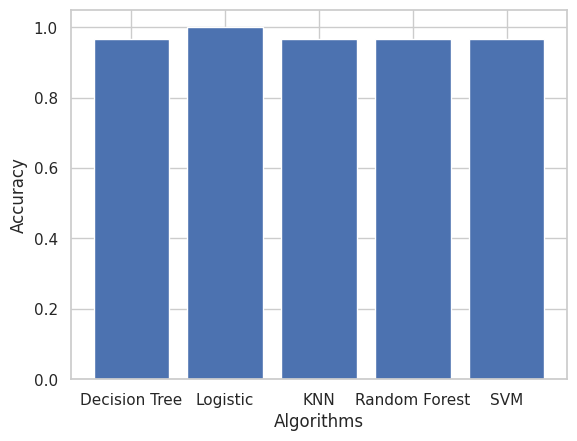

In [377]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()